# NLP Project

In [1]:
# !rm -rf dso-560-nlp-group-project && git clone https://github.com/Shawn-zou-2020/NLP_Group_Project

In [2]:
# %cd NLP_Group_Project

In [3]:
# Packages loading
import pandas as pd
import numpy as np
import re
import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('stopwords')
import string
import math
from sklearn.decomposition import NMF
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from typing import List, Tuple

## Preprocessing

In [4]:
data_all = pd.read_csv('https://raw.githubusercontent.com/Shawn-zou-2020/MyProjects/main/NLP-Google%20Play%20Store%20Apps%20Reviews%20Analysis/Raw%20Data/google_apps_reviews.csv')
data_all.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,category
0,gp:AOqpTOEc9ALwwQfB7YE_eHpPqLep3MNkpAoUUuFiVQd...,Shaikh Abdul,https://play-lh.googleusercontent.com/a-/AOh14...,Earlier it was used to be good but now it's be...,1,83,3.4.4,09-03-22 12:18,NaN,NaN,most_relevant,org.videolan.vlc,videoplayer
1,gp:AOqpTOEzDdiQFlyEkmbDuCHkDtgjNl4c4aBqsF2_LVq...,Prince Vasimalla,https://play-lh.googleusercontent.com/a-/AOh14...,This will be the best video player in Android ...,1,65,3.4.3,12-02-22 10:37,NaN,NaN,most_relevant,org.videolan.vlc,videoplayer
2,gp:AOqpTOFR_spoFuUlZGdZaY_Tvzsi0e3HX2-kpucJ2kD...,veerendra nayak,https://play-lh.googleusercontent.com/a-/AOh14...,Before it was perfectly stable now its all gon...,1,56,3.4.3,14-02-22 13:05,NaN,NaN,most_relevant,org.videolan.vlc,videoplayer
3,gp:AOqpTOEB4YUEpBLQAUYYMWqxOKsn9SGbFw4eEgpJXJo...,MR.FANTABULOUS,https://play-lh.googleusercontent.com/a-/AOh14...,It's was quite stable in its previous versions...,1,100,3.4.3,10-02-22 17:37,NaN,NaN,most_relevant,org.videolan.vlc,videoplayer
4,gp:AOqpTOEKUhJ_kfTeKMj2Hl5h4AKtUiWeedxaPgeKlfF...,Andy283,https://play-lh.googleusercontent.com/a-/AOh14...,*Resume function is not working. Every time I ...,1,227,3.4.3,29-01-22 18:32,NaN,NaN,most_relevant,org.videolan.vlc,videoplayer


In [5]:
data_all.shape

(55744, 13)

In [6]:
# drop_duplicates
data_all.drop_duplicates(subset=['userName', 'content'],inplace=True)
data_all.shape


(49591, 13)

In [7]:
# Get the columns we need
data_all = data_all.loc[:,['content', 'score', 'category']]
data_all.head()

,content,score,category
0,Earlier it was used to be good but now it's be...,1,videoplayer
1,This will be the best video player in Android ...,1,videoplayer
2,Before it was perfectly stable now its all gon...,1,videoplayer
3,It's was quite stable in its previous versions...,1,videoplayer
4,*Resume function is not working. Every time I ...,1,videoplayer


In [8]:
data_all.shape

(49591, 3)

In [9]:
# drop missing value
data_all=data_all[~data_all['content'].isnull()]
data_all.shape

(49589, 3)

In [10]:
# reset index
data_all.reset_index(inplace=True,drop=True)

In [11]:
# !rm -rf dso-560-nlp-group-project && git clone https://github.com/carpedm20/emoji.git
# %cd emoji
# !python setup.py install

In [12]:
# data cleaning
data_all['content']=data_all['content'].str.replace(r"\s\s+",' ')# replace duplicate space into single space
data_all['content']=data_all['content'].str.replace('\n','')# remove \n
data_all['content']=data_all['content'].str.replace('\r','')# remove \r

<ipython-input-12-d3671ecc2fca>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content']=data_all['content'].str.replace(r"\s\s+",' ')# replace duplicate space into single space


In [13]:
# delete emoji
# define a function
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags = re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
data_all['content'] = [str(i) for i in data_all['content']]
data_all['content'] = [remove_emojis(i) for i in data_all['content']]

In [15]:
# %pip install textacy

In [16]:
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols # change these kinds of words
data_all["content"] = data_all["content"].\
  apply(urls).\
  apply(hashtags).\
  apply(currency_symbols).\
  apply(emojis).\
  apply(emails)
#apply(numbers)

In [17]:
# clean content(review)
# Lemmatization
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [18]:
# We noticed that lemmatization will separate "n't" from modal verb like "can't", so to solve this problem, we replace them with "_not"
# Besides, we want to combine the hegative modal verb like "can not" into one single word, so we replace them with "_not"
data_all['content']=data_all['content'].str.replace(r"\b(can)'t\b",r'\1_not')
data_all['content']=data_all['content'].str.replace(r"\b(should|has|have|did|do|does|is|are|was|were|could|must)n't\b",r'\1_not')
data_all['content']=data_all['content'].str.replace(r"\b(should|has|have|did|do|does|is|are|was|were|could|must|can) not\b",r'\1_not')

<ipython-input-18-5dc7e129a20f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content']=data_all['content'].str.replace(r"\b(can)'t\b",r'\1_not')
<ipython-input-18-5dc7e129a20f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content']=data_all['content'].str.replace(r"\b(should|has|have|did|do|does|is|are|was|were|could|must)n't\b",r'\1_not')
<ipython-input-18-5dc7e129a20f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content']=data_all['content'].str.replace(r"\b(should|has|have|did|do|does|is|are|was|were|could|must|can) not\b",r'\1_not')


In [19]:
data_all['content'] = data_all['content'].str.lower()
data_all['content_lemma'] = [lemmatize_sentence(i) for i in data_all['content']]
data_all.head(5)

,content,score,category,content_lemma
0,earlier it was used to be good but now it's be...,1,videoplayer,earlier it be use to be good but now it 's bec...
1,this will be the best video player in android ...,1,videoplayer,this will be the best video player in android ...
2,before it was perfectly stable now its all gon...,1,videoplayer,before it be perfectly stable now its all go w...
3,it's was quite stable in its previous versions...,1,videoplayer,it 's be quite stable in its previous version ...
4,*resume function is_not working. every time i ...,1,videoplayer,* resume function is_not work . every time i m...


In [20]:
# word count for regex and stopwords list
content_str = ' '.join(data_all['content_lemma'])
token = nltk.word_tokenize(content_str)

stopword_list_1 = stopwords.words('english') + list(string.punctuation)
token = [i for i in token if i not in stopword_list_1]

token_counter = Counter(token)
token_counter.most_common(100)

[('app', 22377),
 ('good', 11684),
 ('use', 9966),
 ("'s", 9416),
 ('file', 6432),
 ('work', 6366),
 ('please', 5945),
 ('time', 5928),
 ('like', 5926),
 ('video', 5833),
 ('update', 5522),
 ('get', 5496),
 ('...', 4737),
 ('problem', 4622),
 ('browser', 4580),
 ('``', 4340),
 ('one', 4228),
 ('..', 4214),
 ('show', 4212),
 ('option', 4175),
 ('fix', 4170),
 ('issue', 3933),
 ('also', 3594),
 ('feature', 3530),
 ('make', 3509),
 ('try', 3491),
 ('can_not', 3393),
 ('even', 3361),
 ('download', 3343),
 ('phone', 3338),
 ('give', 3305),
 ('need', 3270),
 ('add', 3263),
 ('open', 3231),
 ('great', 3223),
 ('do_not', 3025),
 ('does_not', 3017),
 ('is_not', 2999),
 ('ad', 2904),
 ('nice', 2890),
 ('bad', 2885),
 ('go', 2866),
 ('play', 2822),
 ('best', 2807),
 ('message', 2803),
 ('call', 2668),
 ('really', 2505),
 ('player', 2425),
 ('new', 2391),
 ('account', 2371),
 ('many', 2298),
 ('still', 2290),
 ('payment', 2288),
 ('see', 2271),
 ('would', 2267),
 ('day', 2264),
 ('send', 2249),
 (

In [21]:
# regex
data_all['content_regex'] = data_all['content_lemma'].str.replace(r'\b(?:one|two|three)\b', '_one_', case=False, regex=True)
#data_all['content_regex'] = data_all['content_regex'].str.replace(r'\blike|love\b', 'like', case=False, regex=True)
#data_all['content_regex'] = data_all['content_regex'].str.replace(r'\bgood|nice|great\b', 'good', case=False, regex=True)
data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:last|late|new|recent) update\b', '_last update_', case=False, regex=True)
data_all['content_regex'] = data_all['content_regex'].str.replace(r"\b(?:love|like|perfer)\b",'_love_',case=False) 
data_all['content_regex'] = data_all['content_regex'].str.replace(r"\b(?:issues?|problems?|bugs?)\b",'_problem_',case=False) 
data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:phone|devices?)\b','_phone_',case=False)
data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:excellent|good|great|well|perfect|nice|fantastic|best|amaze|amazing|awesome|adorable|cute|perfectly)\b','_good_',case=False)
data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:apps?)\b','_app_',case=False)
data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:ads?(vertisements?)?|advertisings?)\b','_ad_',case=False)
data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:many|much)\b','_many_',case=False)


<ipython-input-21-9970c6ced7d4>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content_regex'] = data_all['content_regex'].str.replace(r"\b(?:love|like|perfer)\b",'_love_',case=False)
<ipython-input-21-9970c6ced7d4>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content_regex'] = data_all['content_regex'].str.replace(r"\b(?:issues?|problems?|bugs?)\b",'_problem_',case=False)
<ipython-input-21-9970c6ced7d4>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:phone|devices?)\b','_phone_',case=False)
<ipython-input-21-9970c6ced7d4>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data_all['content_regex'] = data_all['content_regex'].str.replace(r'\b(?:excellent|good|great|well|perfect|nice|fantastic|

In [22]:
# stopword

add_1 = ['...','``', "''",'5'] # puntuation, number
add_2 = ['_app_','really','would',"'ve"]

# non-list
non_list=['no','nor','not','ain','aren',"aren't",'don',"don't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",
 'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",
 'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

stopword_list_2 = [i for i in stopword_list_1 if i not in non_list] + add_1 +add_2

In [23]:
stopword_list_2

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
# word count again to check
content_str = ' '.join(data_all['content_regex'])
token = nltk.word_tokenize(content_str)

token = [i for i in token if i not in stopword_list_2]

token_counter = Counter(token)
token_counter.most_common(100)

[('_good_', 25703),
 ('_problem_', 9990),
 ('use', 9966),
 ("'s", 9416),
 ('not', 9091),
 ('_love_', 8008),
 ('file', 6432),
 ('work', 6366),
 ('please', 5945),
 ('time', 5928),
 ('video', 5833),
 ('get', 5496),
 ('no', 5450),
 ('_one_', 4977),
 ('browser', 4580),
 ('_phone_', 4510),
 ('_many_', 4361),
 ('update', 4217),
 ('..', 4214),
 ('show', 4212),
 ('option', 4175),
 ('fix', 4170),
 ('also', 3594),
 ('feature', 3530),
 ('make', 3509),
 ('try', 3491),
 ('can_not', 3393),
 ('even', 3361),
 ('download', 3343),
 ('give', 3305),
 ('need', 3270),
 ('add', 3263),
 ('open', 3231),
 ('_ad_', 3089),
 ('do_not', 3025),
 ('does_not', 3017),
 ('is_not', 2999),
 ('bad', 2885),
 ('go', 2866),
 ('play', 2822),
 ('message', 2803),
 ('call', 2668),
 ('player', 2425),
 ('account', 2371),
 ('still', 2290),
 ('payment', 2288),
 ('see', 2271),
 ('day', 2264),
 ('send', 2249),
 ('star', 2236),
 ("'m", 2230),
 ('want', 2197),
 ('take', 2165),
 ('say', 2101),
 ('back', 2068),
 ('thing', 2059),
 ('version'

## Whole Dataset

In [23]:
# define the model
def make_sequential_model(plot=False):
    model = Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=max_length))
    model.add(Flatten()) # Flatten makes this a (vocab_size x EMBEDDING_SIZE) x 1 vector.
    model.add(Dense(1, activation='sigmoid')) 
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    # summarize the model
    print(model.summary())
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

# Define an RNN Model
def make_rnn_classification_model(plot=False):
    model = keras.models.Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=max_length))
    model.add(SimpleRNN(units=64)) # 64 is the "units" parameter, which is the dimensionality of the output space.
    model.add(Dense(16)) # a standard fully-connected (Dense) layer
    model.add(Dense(1, activation='sigmoid')) # an output layer with sigmoid activation
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

def score(matrix):
    precision = np.zeros(2)
    recall = np.zeros(2)
    for i in range(2):
        num = matrix[i][i]
        prec_denom = sum(matrix.T[i])
        precision[i] = num/prec_denom if prec_denom != 0 else 0
        rec_denom = sum(matrix[i])
        recall[i] = num/rec_denom if rec_denom != 0 else 0
    print(f'Precision: {precision[1]}')
    print(f'Recall: {recall[1]}')
    print(f'Accuracy: {(matrix[0][0]+matrix[1][1])/matrix.sum()}')
    
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

def get_max_token_length_per_doc(docs: List[List[str]])-> int:
    return max(list(map(lambda x: len(x.split()), docs)))

In [24]:
data_all['good'] = data_all.score.map({1: 0, 5: 1}) 
df = data_all[(data_all.score==1)| (data_all.score==5)]

In [ ]:
X = df.content_regex
y = df.good 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Training Our Own Embeddings
EMBEDDING_SIZE = 50

tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(X_train)

# integer encode the documents
encoded_docs = integer_encode_documents(X_train, tokenizer)
encoded_test_docs = integer_encode_documents(X_test, tokenizer)
# get the max length in terms of token length
max_length = get_max_token_length_per_doc(X_train)
# pad documents to max length
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')
# set the vocabulary size to some number that represents the total number of unique words in our vocabulary
vocab_size = int(len(tokenizer.word_index) * 1.3)

In [ ]:
sequential_model = make_sequential_model()
# fit the model
history = sequential_model.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = sequential_model.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 493, 50)           853450    
                                                                 
 flatten_5 (Flatten)         (None, 24650)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 24651     
                                                                 
Total params: 878,101
Trainable params: 878,101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
451/451 [==============================] - 5s 10ms/step - loss: 0.4772 - acc: 0.7735
Epoch 2/10
451/451 [==============================] - 4s 9ms/step - loss: 0.3355 - acc: 0.8676
Epoch 3/10
451/451 [==============================] - 4s 9ms/step - loss: 0.2838 - acc: 0.8917
Epoch 4/10
451/451 [=

In [ ]:
# make prediction on the padded test documents
pred = sequential_model.predict(padded_test_docs, verbose=0)
score(confusion_matrix(y_test.reset_index().good, (pd.DataFrame(pred)[0] > 0.5)))

Precision: 0.8199076449461262
Recall: 0.8540887226082309
Accuracy: 0.8268109908409659


In [ ]:
confusion_matrix(y_test.reset_index().good, (pd.DataFrame(pred)[0] > 0.5))

array([[1381,  351],
       [ 273, 1598]])

In [ ]:
# RNN
RNN = make_rnn_classification_model()
# fit the model
history = RNN.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = RNN.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 493, 50)           1261500   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                7360      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,269,917
Trainable params: 1,269,917
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
859/859 [==============================] - 148s 169ms/step - loss: 0.6984 - accuracy: 0.5094
Epoch 2/10
859/859 [==============================] - 125s 145ms/step - 

In [ ]:
# make prediction on the padded test documents
pred = RNN.predict(padded_test_docs, verbose=0)
score(confusion_matrix(y_test.reset_index().good, (pd.DataFrame(pred)[0] > 0.5)))

Precision: 0.6567049808429118
Recall: 0.4791724909141739
Accuracy: 0.5982233872142129


In [ ]:
#rf
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             max_df=0.4, stop_words=stopword_list_2+['ever'], 
                             max_features=10000)
X = vectorizer.fit_transform(df.content_regex)
y = df.good
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

score(confusion_matrix(y_test.reset_index().good, (pd.DataFrame(rf.predict_proba(X_test)[:,1])[0] > 0.5)))

Precision: 0.7913513513513514
Recall: 0.7824692677712454
Accuracy: 0.7799056341937275


In [ ]:
confusion_matrix(y_test.reset_index().good, (pd.DataFrame(rf.predict_proba(X_test)[:,1])[0] > 0.5))

array([[1346,  386],
       [ 407, 1464]])

## Payment - Ge Zeng

In [ ]:
data_payment=data_all[data_all['category']=='payment']
data_payment.reset_index(drop=True, inplace=True)
data_payment['label']=data_payment['score'].map({1:0, 5:1, 2:2, 3:2, 4:2})
data_payment.label.value_counts()   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2    6990
1    1968
0    1946
Name: label, dtype: int64

In [ ]:
data_payment=data_payment[(data_payment['label']==0)|(data_payment['label']==1)]

In [ ]:
# Random forest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer=TfidfVectorizer(ngram_range=(2,2),stop_words='english',token_pattern=r'\b[a-zA-Z]{3,}\b',\
                           max_features=2000,binary=True)
X=vectorizer.fit_transform(data_payment['content_regex'])
y=data_payment['label']
X_train, X_test, y_train, y_test=train_test_split(X, y, \
                                                  test_size=0.2, random_state=42,stratify=y)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
np.mean(y_pred==y_test)

0.719029374201788

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


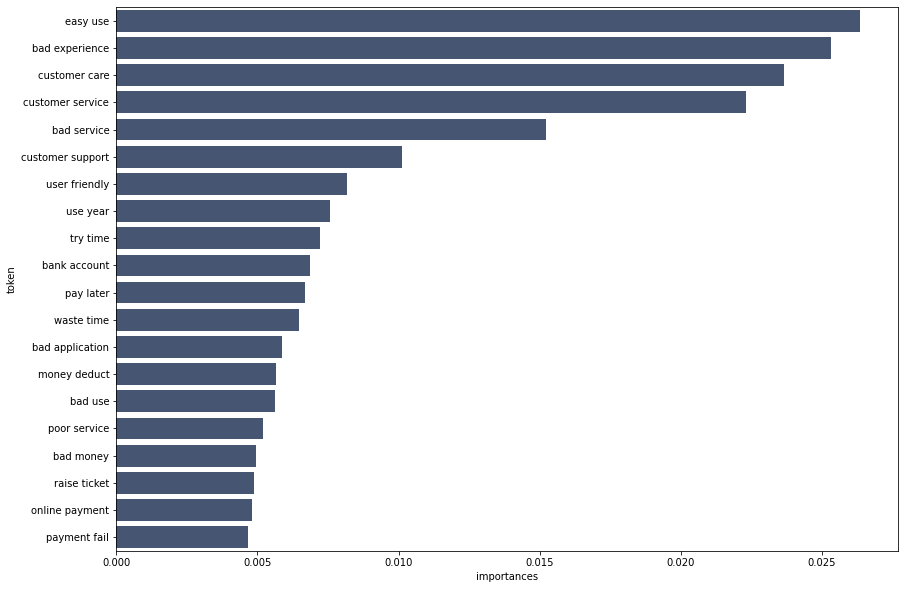

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
var=vectorizer.get_feature_names()
var_importances=pd.DataFrame({'token':var, 'importances':list(model.feature_importances_)})\
.sort_values(by=['importances'], ascending=False).head(20)
fig,ax=plt.subplots(figsize=(14,10))
sns.barplot(x='importances',y='token',data=var_importances,color='#3F5378')
x_labels=[0,0.005,0.01,0.015,0.02,0.025]
ax.set_xticks(x_labels)
plt.show()

In [ ]:
# RNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

def get_max_token_length_per_doc(docs):
    return max(list(map(lambda x: len(x.split()), docs)))

def make_sequential_model(plot=False):
    model = Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=max_length))
    model.add(Flatten()) # Flatten makes this a (vocab_size x EMBEDDING_SIZE) x 1 vector.
    model.add(Dense(1, activation='sigmoid')) 
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    # summarize the model
    print(model.summary())
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

X = data_payment.content_regex
y = data_payment.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Training Our Own Embeddings
EMBEDDING_SIZE = 50

tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(X_train)

# integer encode the documents
encoded_docs = integer_encode_documents(X_train, tokenizer)
encoded_test_docs = integer_encode_documents(X_test, tokenizer)
# get the max length in terms of token length
max_length = get_max_token_length_per_doc(X_train)
# pad documents to max length
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')
# set the vocabulary size to some number that represents the total number of unique words in our vocabulary
vocab_size = int(len(tokenizer.word_index) * 1.3)

sequential_model = make_sequential_model()
# fit the model
history = sequential_model.fit(padded_docs, y_train, epochs=10, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 50)           327900    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 1)                 6401      
                                                                 
Total params: 334,301
Trainable params: 334,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
98/98 [==============================] - 3s 16ms/step - loss: 0.6304 - acc: 0.6407
Epoch 2/10
98/98 [==============================] - 2s 16ms/step - loss: 0.4387 - acc: 0.8349
Epoch 3/10
98/98 [==============================] - 1s 15ms/step - loss: 0.3119 - acc: 0.8988
Epoch 4/10
98/98 [=========

In [ ]:
# evaluate the model
loss, accuracy = sequential_model.evaluate(padded_test_docs, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

25/25 [==============================] - 0s 2ms/step - loss: 0.3993 - acc: 0.8493
Accuracy: 84.929758


In [ ]:
# Topic Modeling - Good
data_payment_good=data_payment[data_payment['label']==1]

stopword_list = ['_good_','great','nice','_app_', 'google', 'payment','pay','_phone_','year']

for i in stopword_list:
    data_payment_good['content_regex']=[r.replace(i,'') for r in data_payment_good['content_regex']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(ngram_range=(2,3), min_df=0.01,max_df=0.4, stop_words='english')
X1, terms1=vectorizer.fit_transform(data_payment_good['content_regex']),vectorizer.get_feature_names()
X1_tfidf=pd.DataFrame(X1.toarray(),columns=terms1)
print(X1_tfidf.shape)
print(X1_tfidf.head(5))

(1968, 7)
   bank account  credit card  customer care  easy use  money transfer  \
0      0.000000          0.0            0.0       0.0             0.0   
1      0.000000          0.0            0.0       0.0             0.0   
2      0.675645          0.0            0.0       0.0             0.0   
3      0.000000          0.0            0.0       0.0             0.0   
4      0.000000          0.0            0.0       0.0             1.0   

   send money  user friendly  
0    0.000000            0.0  
1    0.000000            0.0  
2    0.737227            0.0  
3    0.000000            0.0  
4    0.000000            0.0  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
nmf=NMF(n_components=4)
W1=nmf.fit_transform(X1_tfidf)
H1=nmf.components_
X1.shape, W1.shape, H1.shape

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


((1968, 7), (1968, 4), (4, 7))

In [ ]:
from typing import List
def get_top_tfidf_tokens(H, feature_names,num):
    for topic, vector in enumerate(H):
        print(f'TOPIC {topic}\n')
        total=vector.sum()
        top_scores=vector.argsort()[::-1][:num]
        token_names=list(map(lambda idx: feature_names[idx], top_scores))
        strengths=list(map(lambda idx: vector[idx]/total, top_scores))
        
        for strength, token_name in zip(strengths, token_names):
            print(f'\b {token_name}({round(strength*100,1)}%)\n')
        print(f'='*50)
get_top_tfidf_tokens(H1, X1_tfidf.columns.tolist(),10)

TOPIC 0

 easy use(99.7%)

 credit card(0.3%)

 user friendly(0.0%)

 send money(0.0%)

 money transfer(0.0%)

 customer care(0.0%)

 bank account(0.0%)

TOPIC 1

 user friendly(91.2%)

 customer care(6.3%)

 credit card(2.4%)

 send money(0.0%)

 money transfer(0.0%)

 easy use(0.0%)

 bank account(0.0%)

TOPIC 2

 bank account(87.5%)

 credit card(8.3%)

 customer care(3.4%)

 money transfer(0.8%)

 user friendly(0.0%)

 send money(0.0%)

 easy use(0.0%)

TOPIC 3

 send money(86.8%)

 money transfer(9.5%)

 credit card(3.7%)

 user friendly(0.0%)

 easy use(0.0%)

 customer care(0.0%)

 bank account(0.0%)



In [ ]:
def get_top_documents(W, documents, num):
    sorted_docs=W.argsort(axis=0)[::-1]
    top_docs=sorted_docs[:num].T
    per_document_totals=W.sum(axis=1)
    for topic, topdoc in enumerate(top_docs):
        print(f'Topic {topic}')
        for doc in topdoc:
            score=W[doc][topic]
            percent_topic=round(score/per_document_totals[doc]*100,1)
            print(f'{percent_topic}%', documents[doc])
        print('='*50)
get_top_documents(W1,data_payment_good['content'].tolist(), num=10)

Topic 0
100.0% very straightforward and easy to use! very intuitive...almost no learning curve for my basic use.
100.0% quick and easy to use and top of that good offers.
100.0% i like this app , very useful easy to use......
100.0% very good app and very helpful for needy people, provide loan in low interest, and very easy to use.
100.0% easy to use, easy settlement, i'm using more than 1 year now it's really better than phone pe business and other business app. they even provide emergency loan by looking just credit score. so yeah so far 5 out of 5.
100.0% easy to use. but also want some improvement like that only on watsapp through link is_not imp for machine order status. b'coz so improve your app. update soon. for help us
100.0% satisfied and very much happy. i rarely rate 5 stars to any app but they deserve it. interface is easy to use and payments happens just with a blink of eyes. one suggestion: please send qr code stand alsong with sticker when someone orders the qr. also, pl

In [ ]:
# Topic Modeling - Bad
data_payment_bad=data_payment[data_payment['label']==0]

stopword_list = ['bad','_app_','worse','worst','do_not']

for i in stopword_list:
    data_payment_bad['content_regex']=[r.replace(i,'') for r in data_payment_bad['content_regex']]

data_payment_bad['content_regex']=data_payment_bad['content_regex'].str.replace(r'\b(care|support|service)\b','service',case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(ngram_range=(2,3), min_df=0.01,max_df=0.4, stop_words='english')
X1, terms1=vectorizer.fit_transform(data_payment_bad['content_regex']),vectorizer.get_feature_names()
X1_tfidf=pd.DataFrame(X1.toarray(),columns=terms1)
print(X1_tfidf.shape)
print(X1_tfidf.head(5))

(1946, 37)
   _last update_  _one_ day  _phone_ pe  _problem_ try  bank account  \
0            0.0        0.0    0.000000            0.0           0.0   
1            0.0        0.0    0.515176            0.0           0.0   
2            0.0        0.0    0.000000            0.0           0.0   
3            0.0        0.0    0.000000            0.0           0.0   
4            0.0        0.0    0.000000            0.0           0.0   

   contact customer  contact customer service  credit card  customer service  \
0               0.0                       0.0          0.0          0.316470   
1               0.0                       0.0          0.0          0.518636   
2               0.0                       0.0          0.0          0.000000   
3               0.0                       0.0          0.0          0.000000   
4               0.0                       0.0          0.0          0.000000   

   customer service number  ...  send money  service number  service servic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
nmf=NMF(n_components=4)
W1=nmf.fit_transform(X1_tfidf)
H1=nmf.components_
X1.shape, W1.shape, H1.shape

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


((1946, 37), (1946, 4), (4, 37))

In [ ]:
def get_top_tfidf_tokens(H, feature_names,num):
    for topic, vector in enumerate(H):
        print(f'TOPIC {topic}\n')
        total=vector.sum()
        top_scores=vector.argsort()[::-1][:num]
        token_names=list(map(lambda idx: feature_names[idx], top_scores))
        strengths=list(map(lambda idx: vector[idx]/total, top_scores))
        
        for strength, token_name in zip(strengths, token_names):
            print(f'\b {token_name}({round(strength*100,1)}%)\n')
        print(f'='*50)
get_top_tfidf_tokens(H1, X1_tfidf.columns.tolist(),10)

TOPIC 0

 customer service(65.4%)

 customer service service(3.4%)

 service service(3.2%)

 contact customer service(2.9%)

 contact customer(2.9%)

 resolve _problem_(2.2%)

 customer service number(2.0%)

 service number(2.0%)

 raise ticket(1.6%)

 money deduct(1.6%)

TOPIC 1

 bank account(68.5%)

 credit card(4.0%)

 google pay(4.0%)

 transfer money(3.9%)

 try time(2.2%)

 money deduct(1.8%)

 money debit(1.6%)

 face _problem_(1.5%)

 mobile number(1.5%)

 did_not receive(1.4%)

TOPIC 2

 pay later(69.9%)

 service service(11.2%)

 customer service service(6.7%)

 _one_ day(3.4%)

 google pay(1.4%)

 poor service(1.3%)

 resolve _problem_(1.3%)

 credit card(1.1%)

 mobile number(1.0%)

 fix _problem_(1.0%)

TOPIC 3

 technical _problem_(19.3%)

 make payment(13.5%)

 is_not work(11.0%)

 face _problem_(6.8%)

 _problem_ try(5.5%)

 try time(5.2%)

 send money(4.5%)

 google pay(3.8%)

 _last update_(3.3%)

 payment fail(3.2%)



In [ ]:
import numpy as np
def get_top_documents(W, documents, num):
    sorted_docs=W.argsort(axis=0)[::-1]
    top_docs=sorted_docs[:num].T
    per_document_totals=W.sum(axis=1)
    for topic, topdoc in enumerate(top_docs):
        print(f'Topic {topic}')
        for doc in topdoc:
            score=W[doc][topic]
            percent_topic=round(score/per_document_totals[doc]*100,1)
            print(f'{percent_topic}%', documents[doc])
        print('='*50)
get_top_documents(W1,data_payment_bad['content'].tolist(), num=10)

Topic 0
100.0% you can_not connect to customer care through help and support at all, only selected options to choose which are_not help at all. using this app as last option for my transactions
100.0% pathetic experience had a fraud of transaction no customer support considers the situation. not at all reliable
100.0% very bad customer service. my problem was_not resolved in 1 month. and then paytm team block my account for 90 day's.
100.0% if you needy now they can_not provide a loan for you but whenever you have_not required then they call you. very bad. i am need a loan for extension of my business but they do_not provide. agent says order a swipe machine and i ordered and received as when you need if not support why choose bharat pay, i recommend you to not to purchase and do_not recommend any people for joining. 2nd review. only advertisement is very fast. there is no proper response when i send mail to customer support.
100.0% no proper response by customer support, i made a 5000

## Browsers - Ranyue

In [28]:
browsers = df[df.category == 'browsers']

vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             max_df=0.4, stop_words=stopword_list_2+['ever'])
X = vectorizer.fit_transform(browsers.content_regex)
y = browsers.good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train) 
score(confusion_matrix(y_test.reset_index().good, (pd.DataFrame(lr.predict_proba(X_test)[:,1])[0] > 0.5)))

Precision: 0.7388535031847133
Recall: 0.883248730964467
Accuracy: 0.7810880829015544


In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
score(confusion_matrix(y_test.reset_index().good, (pd.DataFrame(rf.predict_proba(X_test)[:,1])[0] > 0.5)))

Precision: 0.755011135857461
Recall: 0.8604060913705583
Accuracy: 0.7862694300518135


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


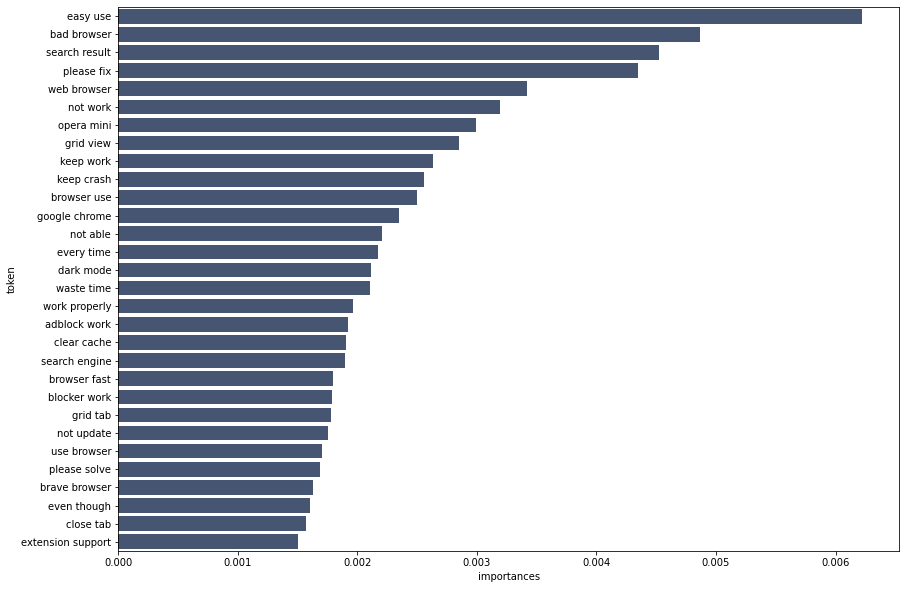

In [ ]:
var = vectorizer.get_feature_names()
##Varaibles are output sorted by importance
var_importances = pd.DataFrame({'token':var,'importances':list(rf.feature_importances_)})\
    .sort_values(by=['importances'],ascending=False).head(30)
##Variable importance visualization
ax, fig = plt.subplots(figsize=(14,10))
sns.barplot(x='importances',y='token',data=var_importances, color='#3F5378')
plt.show()

In [ ]:
X = browsers.content_regex
y = browsers.is_good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Training Our Own Embeddings
EMBEDDING_SIZE = 50

tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(X_train)

# integer encode the documents
encoded_docs = integer_encode_documents(X_train, tokenizer)
encoded_test_docs = integer_encode_documents(X_test, tokenizer)
# get the max length in terms of token length
max_length = get_max_token_length_per_doc(X_train)
# pad documents to max length
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')

# set the vocabulary size to some number that represents the total number of unique words in our vocabulary
vocab_size = int(len(tokenizer.word_index) * 1.3)

In [ ]:
nn = make_sequential_model()
# fit the model
history = nn.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = nn.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))
# calculate score
score(confusion_matrix(y_test.reset_index().is_good, (pd.DataFrame(n.predict(padded_test_docs, verbose=0))[0]>0.5)))

In [ ]:
rnn = make_rnn_classification_model()
# fit the model
history = rnn.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = rnn.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))
# calculate score
score(confusion_matrix(y_test.reset_index().is_good,(pd.DataFrame(rnn.predict(padded_test_docs, verbose=0))[0]>0.5)))

### Topic Modeling

In [ ]:
## Report Results For Each Topic
def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
    """
    Uses the H matrix (K components x M original features) to identify for each topic the most frequent tokens.
    """
    for topic, vector in enumerate(H):
        print(f"TOPIC {topic}\n")
        total = vector.sum()
        top_scores = vector.argsort()[::-1][:num_top_tokens]
        token_names = list(map(lambda idx: feature_names[idx], top_scores))
        strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
        for strength, token_name in zip(strengths, token_names):
            print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
        print(f"=" * 50)
        
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
        print("=" * 50)

#### Good Reviews

In [ ]:
browsers_good = df[(df.category == 'browsers')&(df.score==5)]

stopword_list = ['good','best','better','star','ever','engine','chrome','browser', 'opera','mini','year','google','firefox','excellent']

for i in stopword_list:
    browsers_good['content_regex']=[r.replace(i,'') for r in browsers_good['content_regex']]

browsers_good['content_regex']=browsers_good['content_regex'].str.replace(r'\b(dark|night)\b','dark',case=False)
browsers_good['content_regex']=browsers_good['content_regex'].str.replace(r'\b(keep up|keep work)\b','',case=False)

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             max_df=0.4, stop_words=stopword_list_2, max_features=400)
X = vectorizer.fit_transform(browsers_good.content_regex)
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

## Fit NMF Model¶
nmf = NMF(n_components=4)
W_browsers = nmf.fit_transform(vectorized_df)
H_browsers = nmf.components_

print(f"News Topics:\n\n")
get_top_tf_idf_tokens_for_topic(H_browsers, vectorized_df.columns.tolist(), 10)

get_top_documents_for_each_topic(W_browsers, browsers_good.content.tolist(), num_docs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/

News Topics:


TOPIC 0

easy use (46.8%)

fast easy use (2.5%)

fast easy (2.5%)

highly recommend (1.7%)

mobile version (1.4%)

many feature (1.3%)

use fast (1.3%)

online class (1.2%)

easy use also (1.2%)

use also (1.2%)

TOPIC 1

dark mode (25.7%)

extension support (4.6%)

video player (2.1%)

little bit (1.9%)

ive use (1.9%)

please add (1.8%)

force dark (1.7%)

force dark mode (1.7%)

easy navigate (1.6%)

download manager (1.5%)

TOPIC 2

support extension (29.7%)

play store (6.2%)

work fine (4.8%)

extension work (3.4%)

browse experience (2.8%)

please fix (2.6%)

chromium base (2.5%)

thanks developer (1.6%)

extension support (1.6%)

even though (1.4%)

TOPIC 3

desktop version (22.4%)

mobile version (5.8%)

please add (3.2%)

add feature (2.9%)

edge mobile (2.9%)

browsing experience (2.4%)

use desktop (2.0%)

many feature (2.0%)

feature desktop (2.0%)

work properly (1.9%)

Topic 0
100.0% opera mini is a effective app,eas

#### Poor Reviews

In [ ]:
browsers_bad = df[(df.category == 'browsers')&(df.score==1)]

stopword_list = ['bad','worse','worst','star', 'opera','mini','google','firefox']

for i in stopword_list:
    browsers_bad['content_regex']=[r.replace(i,'') for r in browsers_bad['content_regex']]

browsers_bad['content_regex']=browsers_bad['content_regex'].str.replace(r'\b(not work)\b','',case=False)

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             max_df=0.4, stop_words=stopword_list_2)
X = vectorizer.fit_transform(browsers_bad.content_regex)
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

## Fit NMF Model¶
nmf = NMF(n_components=4)
W_browsers = nmf.fit_transform(vectorized_df)
H_browsers = nmf.components_

print(f"News Topics:\n\n")
get_top_tf_idf_tokens_for_topic(H_browsers, vectorized_df.columns.tolist(), 10)

get_top_documents_for_each_topic(W_browsers, browsers_bad.content.tolist(), num_docs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; 

News Topics:


TOPIC 0

not update (26.8%)

not update reply (3.2%)

chrome not update (3.2%)

update reply (3.1%)

chrome not (2.9%)

try time (1.4%)

try time continuously (1.4%)

not update try (1.4%)

continuously row (1.4%)

continuously row day (1.4%)

TOPIC 1

adblock work (22.0%)

adblock work kinda (2.5%)

kinda useless (2.5%)

work kinda useless (2.5%)

work kinda (2.5%)

play even refresh (1.0%)

video play even (1.0%)

refresh disappointing (1.0%)

even refresh disappointing (1.0%)

even refresh (1.0%)

TOPIC 2

grid view (1.8%)

force grid (0.7%)

force grid view (0.7%)

bring back (0.5%)

tab grid (0.5%)

tab grid view (0.5%)

view tab (0.5%)

change force grid (0.4%)

change force (0.4%)

hate grid (0.4%)

TOPIC 3

update chrome (0.6%)

please fix (0.5%)

browser ever (0.5%)

play store (0.5%)

ever use (0.5%)

browser ever use (0.5%)

unable update (0.5%)

chrome play (0.4%)

update chrome play (0.4%)

chrome play store (0.4%)

To

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
score(confusion_matrix(y_test.reset_index().good, (pd.DataFrame(rf.predict_proba(X_test)[:,1])[0] > 0.5)))

Precision: 0.755011135857461
Recall: 0.8604060913705583
Accuracy: 0.7862694300518135


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


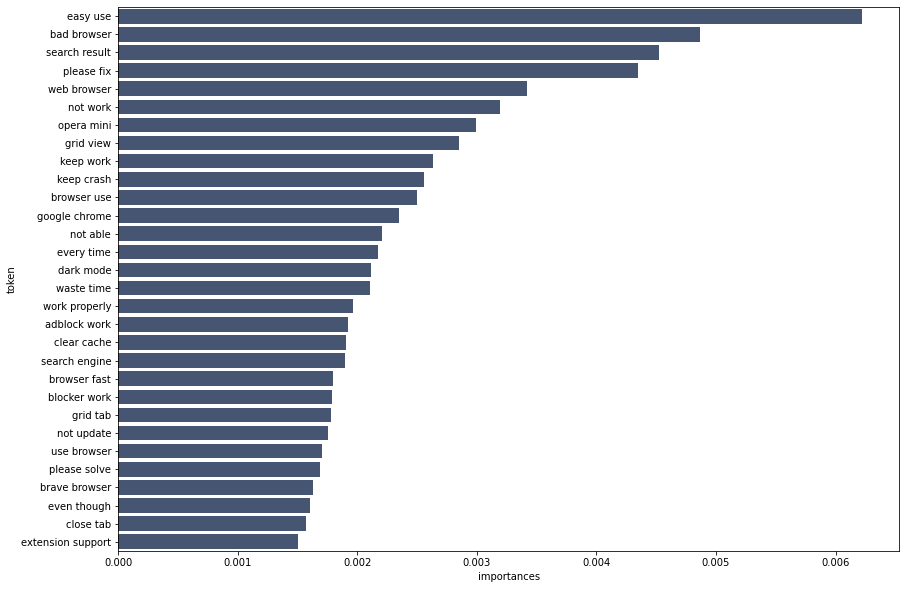

In [ ]:
var = vectorizer.get_feature_names()
##Varaibles are output sorted by importance
var_importances = pd.DataFrame({'token':var,'importances':list(rf.feature_importances_)})\
    .sort_values(by=['importances'],ascending=False).head(30)
##Variable importance visualization
ax, fig = plt.subplots(figsize=(14,10))
sns.barplot(x='importances',y='token',data=var_importances, color='#3F5378')
plt.show()

In [ ]:
X = browsers.content_regex
y = browsers.is_good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Training Our Own Embeddings
EMBEDDING_SIZE = 50

tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(X_train)

# integer encode the documents
encoded_docs = integer_encode_documents(X_train, tokenizer)
encoded_test_docs = integer_encode_documents(X_test, tokenizer)
# get the max length in terms of token length
max_length = get_max_token_length_per_doc(X_train)
# pad documents to max length
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')

# set the vocabulary size to some number that represents the total number of unique words in our vocabulary
vocab_size = int(len(tokenizer.word_index) * 1.3)

In [ ]:
nn = make_sequential_model()
# fit the model
history = nn.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = nn.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))
# calculate score
score(confusion_matrix(y_test.reset_index().is_good, (pd.DataFrame(n.predict(padded_test_docs, verbose=0))[0]>0.5)))

In [ ]:
rnn = make_rnn_classification_model()
# fit the model
history = rnn.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = rnn.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))
# calculate score
score(confusion_matrix(y_test.reset_index().is_good,(pd.DataFrame(rnn.predict(padded_test_docs, verbose=0))[0]>0.5)))

### Topic Modeling

In [ ]:
## Report Results For Each Topic
def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
    """
    Uses the H matrix (K components x M original features) to identify for each topic the most frequent tokens.
    """
    for topic, vector in enumerate(H):
        print(f"TOPIC {topic}\n")
        total = vector.sum()
        top_scores = vector.argsort()[::-1][:num_top_tokens]
        token_names = list(map(lambda idx: feature_names[idx], top_scores))
        strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
        for strength, token_name in zip(strengths, token_names):
            print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
        print(f"=" * 50)
        
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
        print("=" * 50)

#### Good Reviews

In [ ]:
browsers_good = df[(df.category == 'browsers')&(df.score==5)]

stopword_list = ['good','best','better','star','ever','engine','chrome','browser', 'opera','mini','year','google','firefox','excellent']

for i in stopword_list:
    browsers_good['content_regex']=[r.replace(i,'') for r in browsers_good['content_regex']]

browsers_good['content_regex']=browsers_good['content_regex'].str.replace(r'\b(dark|night)\b','dark',case=False)
browsers_good['content_regex']=browsers_good['content_regex'].str.replace(r'\b(keep up|keep work)\b','',case=False)

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             max_df=0.4, stop_words=stopword_list_2, max_features=400)
X = vectorizer.fit_transform(browsers_good.content_regex)
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

## Fit NMF Model¶
nmf = NMF(n_components=4)
W_browsers = nmf.fit_transform(vectorized_df)
H_browsers = nmf.components_

print(f"News Topics:\n\n")
get_top_tf_idf_tokens_for_topic(H_browsers, vectorized_df.columns.tolist(), 10)

get_top_documents_for_each_topic(W_browsers, browsers_good.content.tolist(), num_docs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/

News Topics:


TOPIC 0

easy use (46.8%)

fast easy use (2.5%)

fast easy (2.5%)

highly recommend (1.7%)

mobile version (1.4%)

many feature (1.3%)

use fast (1.3%)

online class (1.2%)

easy use also (1.2%)

use also (1.2%)

TOPIC 1

dark mode (25.7%)

extension support (4.6%)

video player (2.1%)

little bit (1.9%)

ive use (1.9%)

please add (1.8%)

force dark (1.7%)

force dark mode (1.7%)

easy navigate (1.6%)

download manager (1.5%)

TOPIC 2

support extension (29.7%)

play store (6.2%)

work fine (4.8%)

extension work (3.4%)

browse experience (2.8%)

please fix (2.6%)

chromium base (2.5%)

thanks developer (1.6%)

extension support (1.6%)

even though (1.4%)

TOPIC 3

desktop version (22.4%)

mobile version (5.8%)

please add (3.2%)

add feature (2.9%)

edge mobile (2.9%)

browsing experience (2.4%)

use desktop (2.0%)

many feature (2.0%)

feature desktop (2.0%)

work properly (1.9%)

Topic 0
100.0% opera mini is a effective app,eas

#### Poor Reviews

In [ ]:
browsers_bad = df[(df.category == 'browsers')&(df.score==1)]

stopword_list = ['bad','worse','worst','star', 'opera','mini','google','firefox']

for i in stopword_list:
    browsers_bad['content_regex']=[r.replace(i,'') for r in browsers_bad['content_regex']]

browsers_bad['content_regex']=browsers_bad['content_regex'].str.replace(r'\b(not work)\b','',case=False)

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             token_pattern=r'\b[a-zA-Z]{3,}\b',
                             max_df=0.4, stop_words=stopword_list_2)
X = vectorizer.fit_transform(browsers_bad.content_regex)
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

## Fit NMF Model¶
nmf = NMF(n_components=4)
W_browsers = nmf.fit_transform(vectorized_df)
H_browsers = nmf.components_

print(f"News Topics:\n\n")
get_top_tf_idf_tokens_for_topic(H_browsers, vectorized_df.columns.tolist(), 10)

get_top_documents_for_each_topic(W_browsers, browsers_bad.content.tolist(), num_docs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; 

News Topics:


TOPIC 0

not update (26.8%)

not update reply (3.2%)

chrome not update (3.2%)

update reply (3.1%)

chrome not (2.9%)

try time (1.4%)

try time continuously (1.4%)

not update try (1.4%)

continuously row (1.4%)

continuously row day (1.4%)

TOPIC 1

adblock work (22.0%)

adblock work kinda (2.5%)

kinda useless (2.5%)

work kinda useless (2.5%)

work kinda (2.5%)

play even refresh (1.0%)

video play even (1.0%)

refresh disappointing (1.0%)

even refresh disappointing (1.0%)

even refresh (1.0%)

TOPIC 2

grid view (1.8%)

force grid (0.7%)

force grid view (0.7%)

bring back (0.5%)

tab grid (0.5%)

tab grid view (0.5%)

view tab (0.5%)

change force grid (0.4%)

change force (0.4%)

hate grid (0.4%)

TOPIC 3

update chrome (0.6%)

please fix (0.5%)

browser ever (0.5%)

play store (0.5%)

ever use (0.5%)

browser ever use (0.5%)

unable update (0.5%)

chrome play (0.4%)

update chrome play (0.4%)

chrome play store (0.4%)

To

## Videoplayer - Xinyue

In [25]:
data_all.head()

,content,score,category,content_lemma,content_regex
0,earlier it was used to be good but now it's be...,1,videoplayer,earlier it be use to be good but now it 's bec...,earlier it be use to be _good_ but now it 's b...
1,this will be the best video player in android ...,1,videoplayer,this will be the best video player in android ...,this will be the _good_ video player in androi...
2,before it was perfectly stable now its all gon...,1,videoplayer,before it be perfectly stable now its all go w...,before it be _good_ stable now its all go wron...
3,it's was quite stable in its previous versions...,1,videoplayer,it 's be quite stable in its previous version ...,it 's be quite stable in its previous version ...
4,*resume function is_not working. every time i ...,1,videoplayer,* resume function is_not work . every time i m...,* resume function is_not work . every time i m...


In [26]:
data_video_good = data_all.loc[(data_all['score']>4)&(data_all['category']=='videoplayer'),:]
data_video_bad = data_all.loc[(data_all['score']<2)&(data_all['category']=='videoplayer'),:]

In [27]:
print(data_video_good.shape)
print(data_video_bad.shape)

(1786, 5)
(1467, 5)


In [28]:
stopword_list_videoadd=['video','player','ever','also','use','please','rating','star']
stopword_list_video=stopword_list_2+stopword_list_videoadd

In [29]:
stopword_list_video_good=['_good_','five','_love_','_problem_']
stopword_list_video=stopword_list_video_good+stopword_list_video

### Positive Review

In [30]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                            token_pattern='(?u)\\b[a-zA-Z_]+\\b',
                            min_df=3, max_df=0.4, stop_words=stopword_list_video)

X_video_good, video_good_terms = vectorizer.fit_transform(data_video_good.content_regex), vectorizer.get_feature_names() #get_feature_names_out()
video_good_tf_idf = pd.DataFrame(X_video_good.toarray(), columns=video_good_terms)

print(f"videoplayer good TF-IDF: {video_good_tf_idf.shape}")
video_good_tf_idf.head(5)

videoplayer good TF-IDF: (1786, 357)


,_ad_ come,_ad_ do_not,_ad_ free,_ad_ no,_ad_ thanks,_ad_ user,_last update_,_many_ _ad_,_many_ _many_,_many_ _many_ mx,...,without difficulty,without interruption,wo n,work _phone_,work android,work fine,work guy,work properly,work smoothly,work thank
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# from 618 features to 5 topics
nmf = NMF(n_components=5)
W_video_good = nmf.fit_transform(X_video_good)
H_video_good = nmf.components_
print(f"Original shape of X video_good is {X_video_good.shape}")
print(f"Decomposed W video_good matrix is {W_video_good.shape}")
print(f"Decomposed H video_good matrix is {H_video_good.shape}")

Original shape of X video_good is (1786, 357)
Decomposed W video_good matrix is (1786, 5)
Decomposed H video_good matrix is (5, 357)


C:\Users\Olivia\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


#### Report Results For Each Topic

In [32]:
from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)


In [33]:
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
        print("=" * 50)

In [34]:
get_top_tf_idf_tokens_for_topic(H_video_good, video_good_tf_idf.columns.tolist(), 10)
get_top_documents_for_each_topic(W_video_good, data_video_good.content.tolist(), num_docs=10)

TOPIC 0

no _ad_ (43.9%)

user friendly (3.6%)

user interface (3.0%)

switch mx (2.2%)

no _ad_ no (2.0%)

_ad_ no (2.0%)

_ad_ thanks (1.9%)

_ad_ user (1.7%)

free no _ad_ (1.7%)

free no (1.6%)

TOPIC 1

android tv (30.1%)

audio passthrough (3.6%)

highly recommend (2.3%)

tv show (2.2%)

tv box (2.1%)

work properly (2.1%)

play store (1.9%)

cast movie (1.9%)

almost everything (1.9%)

does_not work (1.8%)

TOPIC 2

watch movie (32.8%)

_many_ _ad_ (11.5%)

control subtitle (5.2%)

application watch (3.6%)

volume brightness (3.4%)

listen song (2.8%)

help lot (2.6%)

_many_ option (2.2%)

tv series (2.2%)

movie show (2.0%)

TOPIC 3

_many_ feature (52.2%)

highly recommend (6.0%)

sound effect (5.3%)

web series (4.7%)

download file (4.2%)

tv show (2.2%)

offline online (2.2%)

play store (1.6%)

google play (1.4%)

watch _many_ (1.2%)

TOPIC 4

audio format (14.1%)

play audio (12.5%)

_ad_ free (3.0%)

support audio (2.6%)

sup

### Poor Review

In [35]:
stopword_list_video_bad=stopword_list_2+stopword_list_videoadd

In [43]:
stopword_list_video_bad

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
data_video_bad['content_regex'] = data_video_bad['content_regex'].str.replace(r'\b(((should|has|have|did|do|does|is|are|was|were|could|must)_)?not work\s?(properly)?)\b','_problem_',case=False)

<ipython-input-44-1d42c441bb80>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_video_bad['content_regex'] = data_video_bad['content_regex'].str.replace(r'\b(((should|has|have|did|do|does|is|are|was|were|could|must)_)?not work\s?(properly)?)\b','_problem_',case=False)
<ipython-input-44-1d42c441bb80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_video_bad['content_regex'] = data_video_bad['content_regex'].str.replace(r'\b(((should|has|have|did|do|does|is|are|was|were|could|must)_)?not work\s?(properly)?)\b','_problem_',case=False)


In [45]:
stopword_list_video_bad=stopword_list_2+stopword_list_videoadd+['_problem_']

In [51]:
vectorizer = TfidfVectorizer(ngram_range=(2,3),
                            token_pattern=r'\b[a-zA-Z_]{2,}\b',
                            min_df=3, max_df=0.4, stop_words=stopword_list_video_bad)
                            
X_video_bad, video_bad_terms = vectorizer.fit_transform(data_video_bad.content_regex), vectorizer.get_feature_names() #get_feature_names_out()
video_bad_tf_idf = pd.DataFrame(X_video_bad.toarray(), columns=video_bad_terms)

print(f"videoplayer TF-IDF: {video_bad_tf_idf.shape}")
video_bad_tf_idf.head(5)

videoplayer TF-IDF: (1467, 476)


,_ad_ _ad_,_ad_ _ad_ _ad_,_ad_ _good_,_ad_ _love_,_ad_ _one_,_ad_ appear,_ad_ can_not,_ad_ come,_ad_ do_not,_ad_ even,...,whenever try,without _ad_,wo let,wo play,wont play,work _good_,work fine,work properly,worst play,year ago
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.273509,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [52]:
# from 618 features to 5 topics
nmf = NMF(n_components=4)
W_video_bad = nmf.fit_transform(X_video_bad)
H_video_bad = nmf.components_
print(f"Original shape of X video_bad is {X_video_bad.shape}")
print(f"Decomposed W video_bad matrix is {W_video_bad.shape}")
print(f"Decomposed H video_bad matrix is {H_video_bad.shape}")

Original shape of X video_bad is (1467, 476)
Decomposed W video_bad matrix is (1467, 4)
Decomposed H video_bad matrix is (4, 476)


C:\Users\Olivia\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


#### Report Results For Each Topic

In [53]:
get_top_tf_idf_tokens_for_topic(H_video_bad, video_bad_tf_idf.columns.tolist(), 10)
get_top_documents_for_each_topic(W_video_bad, data_video_bad.content.tolist(), num_docs=10)

TOPIC 0

_many_ _ad_ (44.2%)

show _many_ (2.3%)

show _many_ _ad_ (2.3%)

_ad_ every (2.1%)

_many_ _ad_ every (1.9%)

show _ad_ (1.5%)

_ad_ come (1.5%)

way _many_ (1.4%)

_ad_ _love_ (1.4%)

_ad_ can_not (1.3%)

TOPIC 1

_last update_ (28.7%)

even though (3.8%)

unable play (2.4%)

every time (2.2%)

can_not play (1.7%)

_many_ time (1.7%)

bad experience (1.2%)

work properly (1.2%)

fix asap (1.2%)

play song (1.2%)

TOPIC 2

not support (52.4%)

audio not (4.1%)

update _good_ (2.6%)

format not (2.6%)

audio format (2.6%)

vob file (2.6%)

automatically start (2.5%)

download movie (2.5%)

videos not (2.5%)

useless not (2.5%)

TOPIC 3

waste time (31.7%)

audio format (2.4%)

full _ad_ (2.2%)

time data (2.0%)

long time (2.0%)

click play (1.9%)

useless do_not (1.8%)

_many_ not (1.8%)

unable play (1.7%)

every time (1.5%)

Topic 0
100.0% too many advertisements
100.0% too many ads
100.0% too many ads
100.0% don'ts support my avi for

#### Random forest

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [56]:
video_good_tf_idf

,_ad_ come,_ad_ do_not,_ad_ free,_ad_ no,_ad_ thanks,_ad_ user,_last update_,_many_ _ad_,_many_ _many_,_many_ _many_ mx,...,without difficulty,without interruption,wo n,work _phone_,work android,work fine,work guy,work properly,work smoothly,work thank
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
data_video_good.reset_index(inplace=True)
data_video_bad.reset_index(inplace=True)

In [58]:
data_video_good

,index,content,score,category,content_lemma,content_regex
0,947,"the best easy to use media player, almost supp...",5,videoplayer,"the best easy to use medium player , almost su...","the _good_ easy to use medium player , almost ..."
1,948,goat video player on pc as well as on android ...,5,videoplayer,goat video player on pc as well as on android ...,goat video player on pc as _good_ as on androi...
2,949,best video player in the store. bug report : 1...,5,videoplayer,best video player in the store . bug report : ...,_good_ video player in the store . _problem_ r...
3,950,very good clarity. regularly listening music t...,5,videoplayer,very good clarity . regularly listen music thr...,very _good_ clarity . regularly listen music t...
4,951,"hindi subtitles are displayed as box, but when...",5,videoplayer,"hindi subtitle be display as box , but when sa...","hindi subtitle be display as box , but when sa..."
...,...,...,...,...,...,...
1781,8425,it really makes everything look great from the...,5,videoplayer,it really make everything look great from the ...,it really make everything look _good_ from the...
1782,8426,excellent,5,videoplayer,excellent,_good_
1783,8427,wonderfull video player. the real heart of arc...,5,videoplayer,wonderfull video player . the real heart of ar...,wonderfull video player . the real heart of ar...
1784,8428,movies with music,5,videoplayer,movie with music,movie with music


In [59]:
data_video_all=data_all.loc[((data_all['score']==1)|(data_all['score']==5))&(data_all['category']=='videoplayer'),]
data_video_all.shape

(3253, 5)

In [60]:
data_video_all['sentiment']=data_video_all['score'].map(lambda x: 0 if x<3  else 1)
data_video_all.head()

<ipython-input-60-72878163cf7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_video_all['sentiment']=data_video_all['score'].map(lambda x: 0 if x<3  else 1)


,content,score,category,content_lemma,content_regex,sentiment
0,earlier it was used to be good but now it's be...,1,videoplayer,earlier it be use to be good but now it 's bec...,earlier it be use to be _good_ but now it 's b...,0
1,this will be the best video player in android ...,1,videoplayer,this will be the best video player in android ...,this will be the _good_ video player in androi...,0
2,before it was perfectly stable now its all gon...,1,videoplayer,before it be perfectly stable now its all go w...,before it be _good_ stable now its all go wron...,0
3,it's was quite stable in its previous versions...,1,videoplayer,it 's be quite stable in its previous version ...,it 's be quite stable in its previous version ...,0
4,*resume function is_not working. every time i ...,1,videoplayer,* resume function is_not work . every time i m...,* resume function is_not work . every time i m...,0


In [56]:
vectorizer_video_all = TfidfVectorizer(ngram_range=(2,3),
                            token_pattern='(?u)\\b[a-zA-Z_]+\\b',
                            min_df=5, max_df=0.4, stop_words=stopword_list_video)

X_video, video_terms = vectorizer_video_all.fit_transform(data_video_all.content_regex), vectorizer_video_all.get_feature_names() #get_feature_names_out()
video_tf_idf = pd.DataFrame(X_video.toarray(), columns=video_terms)

print(f"videoplayer all TF-IDF: {video_tf_idf.shape}")
video_tf_idf.head(5)

videoplayer all TF-IDF: (3253, 369)


,_ad_ _ad_,_ad_ _love_,_ad_ _one_,_ad_ can_not,_ad_ come,_ad_ do_not,_ad_ even,_ad_ every,_ad_ free,_ad_ minute,...,without _ad_,wo n,wo n let,wo n play,work _love_,work android,work fine,work guy,work properly,work update
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
Y_video_trntst=data_video_all['sentiment'].values
Y_video_trntst

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
X_video_trntst=video_tf_idf.values
X_video_trntst

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
# train/test split
# X_train, X_test, y_train, y_test = train_test_split(X_video_trntst, Y_video_trntst, test_size=0.2, random_state=1)

In [59]:
num_cross_val = 10
labels = []
train_scores = []
test_scores = []

In [60]:
def clf_score(clf, x_train, y_train, label, train_scores, test_scores, cv=num_cross_val, n_jobs=-1):
    score = cross_validate(clf, x_train, y_train, scoring=None, cv=cv, n_jobs=n_jobs,
                        return_train_score=True, return_estimator=True)
    train_scores.append(score['train_score'])
    test_scores.append(score['test_score'])
    labels.append(label)
   
    mean_score=pd.DataFrame()
    mean_score.loc[0,'mean_train_score']=np.mean(score['train_score'])
    mean_score.loc[0,'mean_test_score']=np.mean(score['test_score'])
    print(mean_score)
    result=pd.DataFrame()
    result['Train']=score['train_score']
    result['Test']=score['test_score']
    print(result)

In [61]:
# choose the best jyperparameters
# rfc = RandomForestClassifier(n_estimators=100,
#                              max_depth=30,
#                              max_features='sqrt',
#                              criterion='entropy')

params={'n_estimators':100, 'max_depth':None, 'max_features':'auto','min_samples_leaf':1}
rf = RandomForestClassifier(**params) 
clf_score(rf, X_video_trntst, Y_video_trntst, 'RF', train_scores, test_scores, n_jobs=-1)

   mean_train_score  mean_test_score
0          0.780612         0.670771
      Train      Test
0  0.771438  0.690184
1  0.772122  0.705521
2  0.782371  0.598160
3  0.781421  0.704615
4  0.783811  0.661538
5  0.775956  0.707692
6  0.784153  0.655385
7  0.784836  0.673846
8  0.787227  0.664615
9  0.782787  0.646154


In [62]:
params={'n_estimators':100, 'max_depth':None, 'max_features':'auto','min_samples_leaf':1}
rf_final = RandomForestClassifier(**params) 
rf_final.fit(X_video_trntst,Y_video_trntst)
rf_final.feature_importances_

array([3.70098327e-03, 2.60449588e-03, 9.28057703e-04, 6.47763494e-04,
       6.36677862e-03, 5.76898700e-04, 1.65753336e-03, 3.95240110e-03,
       4.36039037e-03, 4.22437152e-04, 9.55520037e-04, 8.50189129e-04,
       3.00045976e-03, 1.95443243e-03, 2.03478953e-03, 1.70670895e-02,
       1.06376962e-03, 1.32302013e-03, 2.36068386e-03, 9.40025321e-04,
       1.34677559e-03, 1.99851903e-03, 3.06553734e-04, 5.64770850e-03,
       4.89539152e-03, 1.50035578e-03, 6.55832984e-04, 4.39934915e-04,
       1.65123036e-03, 1.44491936e-03, 1.90556553e-03, 1.69183956e-03,
       1.44471170e-03, 1.87769838e-03, 2.21574687e-03, 1.34671349e-03,
       4.01953362e-03, 3.00074591e-03, 1.48138295e-03, 2.13822614e-03,
       1.32120373e-03, 9.50043871e-04, 7.67227956e-04, 7.73766448e-04,
       1.25359688e-03, 3.69080201e-03, 2.94180143e-03, 1.54318627e-03,
       9.66620880e-04, 7.32118937e-04, 5.28562513e-04, 2.99389430e-03,
       3.44208319e-03, 3.16644676e-04, 2.91758176e-03, 2.57879132e-03,
      

In [63]:
import time
import numpy as np
start_time = time.time()
importances = rf_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_final.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


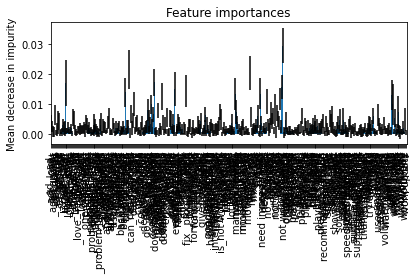

In [64]:
feature_names = video_tf_idf.columns
forest_importances = pd.Series(importances, index=feature_names)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Text(0.5, 0, 'Random Forest Feature Importance')

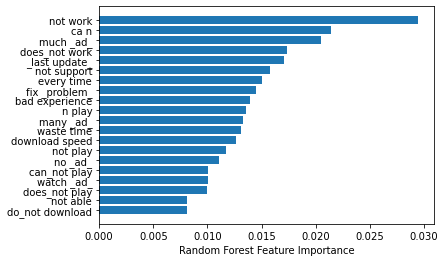

In [67]:
sorted_idx = rf_final.feature_importances_.argsort()
plt.barh(video_tf_idf.columns[sorted_idx[-20:]], rf_final.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

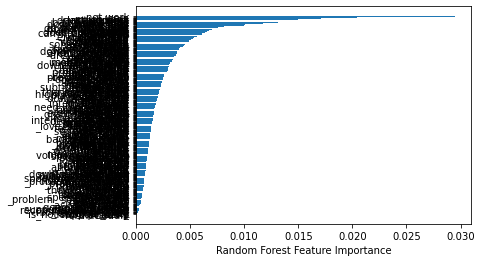

In [66]:
sorted_idx = rf_final.feature_importances_.argsort()
plt.barh(video_tf_idf.columns[sorted_idx], rf_final.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [148]:
sorted_idx[:10]

array([130, 701, 362, 151, 265, 836, 248, 159, 405, 145], dtype=int64)

#### sequential model

In [68]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Flatten, concatenate, Activation, RepeatVector, Permute

def make_sequential_model(plot=False):
    model = Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=max_length))
    model.add(Flatten()) # Flatten makes this a (vocab_size x EMBEDDING_SIZE) x 1 vector.
    model.add(Dense(1, activation='sigmoid')) 
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    # summarize the model
    print(model.summary())
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [69]:
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking
import keras

# Define an RNN Model
def make_rnn_classification_model(plot=False):
    model = keras.models.Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=max_length))
    model.add(SimpleRNN(units=64)) # 64 is the "units" parameter, which is the dimensionality of the output space.
    model.add(Dense(16)) # a standard fully-connected (Dense) layer
    model.add(Dense(1, activation='sigmoid')) # an output layer with sigmoid activation
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [70]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

In [71]:
def get_max_token_length_per_doc(docs: List[List[str]])-> int:
    return max(list(map(lambda x: len(x.split()), docs)))

In [72]:
X = data_video_all.content_regex
y = data_video_all.sentiment 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Training Our Own Embeddings
EMBEDDING_SIZE = 50

tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(X_train)

# integer encode the documents
encoded_docs = integer_encode_documents(X_train, tokenizer)
encoded_test_docs = integer_encode_documents(X_test, tokenizer)
# get the max length in terms of token length
max_length = get_max_token_length_per_doc(X_train)
# pad documents to max length
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')
# set the vocabulary size to some number that represents the total number of unique words in our vocabulary
vocab_size = int(len(tokenizer.word_index) * 1.3)

In [73]:
sequential_model = make_sequential_model()
# fit the model
history = sequential_model.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = sequential_model.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 240, 50)           268450    
                                                                 
 flatten (Flatten)           (None, 12000)             0         
                                                                 
 dense (Dense)               (None, 1)                 12001     
                                                                 
Total params: 280,451
Trainable params: 280,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
82/82 [==============================] - 1s 4ms/step - loss: 0.6779 - acc: 0.5834
Epoch 2/10
82/82 [==============================] - 0s 4ms/step - loss: 0.5347 - acc: 0.7944
Epoch 3/10
82/82 [==============================] - 0s 4ms/step - loss: 0.3781 - acc: 0.8655
Epoch 4/10
82/82 [============

In [78]:
RNN = make_rnn_classification_model()
# fit the model
history = RNN.fit(padded_docs, y_train, epochs=10, verbose=1)
# evaluate the model
loss, accuracy = RNN.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 240, 50)           268450    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                7360      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 276,867
Trainable params: 276,867
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
82/82 [==============================] - 3s 26ms/step - loss: 0.6944 - accuracy: 0.5288
Epoch 2/10
82/82 [==============================] - 2s 27ms/step - loss: 0.6912 -

## Filemanager - Feiran

RF

In [61]:
fdata = data_all.loc[data_all['category']=='filemanager',:]
fdata['good'] = [1 if i>=5 else 0 if i<=1 else -1 for i in fdata['score']]
fdata = fdata.loc[fdata['good']!=-1,:]
fdata.head()

<ipython-input-61-853b831e0770>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata['good'] = [1 if i>=5 else 0 if i<=1 else -1 for i in fdata['score']]


,content,score,category,content_lemma,content_regex,good
8430,useless. utter failure to copy or move files f...,1,filemanager,useless . utter failure to copy or move file f...,useless . utter failure to copy or move file f...,0
8431,app start crashing now and when u open ur medi...,1,filemanager,app start crash now and when u open ur medium ...,_app_ start crash now and when u open ur mediu...,0
8432,installed this to support paragon. when ever t...,1,filemanager,instal this to support paragon . when ever try...,instal this to support paragon . when ever try...,0
8433,formatted my dslr memory card having hundreds ...,1,filemanager,format my dslr memory card have hundred of pho...,format my dslr memory card have hundred of pho...,0
8434,man what a garbage..... im clickimg select on ...,1,filemanager,man what a garbage ..... im clickimg select on...,man what a garbage ..... im clickimg select on...,0


In [62]:
fdata.reset_index(inplace=True,drop=True)

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             token_pattern='(?u)\\b[a-zA-Z_]+\\b',
                             max_features=1000, stop_words=stopword_list_2)

In [64]:
corpus = list(fdata["content_regex"].values)
X = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
fdf = pd.DataFrame(X.toarray(), columns=terms)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [66]:
X_trntst=fdf
Y_trntst=fdata["score"]

In [67]:
labels = []
train_scores = []
test_scores = []

def clf_score(clf, X, y, label, train_scores, test_scores, cv=10, n_jobs=-1):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_validate
    kfolds = StratifiedKFold(n_splits = 10, shuffle = True)
    score = cross_validate(clf, X, y, scoring=None, cv=kfolds, n_jobs=n_jobs,
                           return_train_score=True, return_estimator=True)
    train_scores.append(score['train_score'])
    test_scores.append(score['test_score'])
    labels.append(label)
    print(np.mean(score['train_score']), np.mean(score['test_score']))
    rf_cv_df = pd.DataFrame(score['test_score'],score['train_score'])
    rf_cv_df

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
clf_score(rf, X_trntst, Y_trntst, 'RF', train_scores, test_scores, n_jobs=-1)

0.8635827777425265 0.7201953994558495


In [69]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3,shuffle=True)
rf=RandomForestClassifier()
rf.fit(X_trn,Y_trn)

RandomForestClassifier()

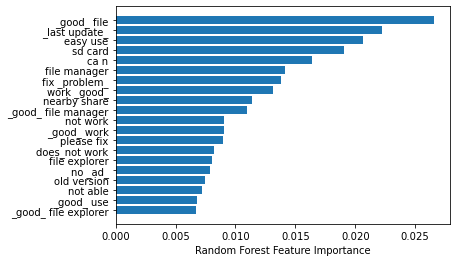

In [70]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# get the top 20 important feature
import matplotlib.pyplot as plt
sorted_idx = rf.feature_importances_.argsort()
plt.barh(fdf.columns[sorted_idx[-20:]], rf.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [71]:
vectorizer1 = TfidfVectorizer(ngram_range=(1,3),
                             token_pattern='(?u)\\b[a-zA-Z_]+\\b',
                             max_features=1000, stop_words=stopword_list_2)

In [72]:
corpus = list(fdata["content_regex"].values)
X = vectorizer1.fit_transform(corpus)
terms = vectorizer1.get_feature_names()
fdf1 = pd.DataFrame(X.toarray(), columns=terms)

In [73]:
X_trntst=fdf1
Y_trntst=fdata["score"]

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
clf_score(rf, X_trntst, Y_trntst, 'RF', train_scores, test_scores, n_jobs=-1)

0.9495305923422374 0.8165749443482561


topic modelling

In [81]:
data_file_good=fdata[fdata['good']==1]
data_file_bad=fdata[fdata['good']==0]

In [82]:
stopword_list_file_add=['ever','also','please','rating','star','file','manager']
stopword_list_file_good=stopword_list_2+stopword_list_file_add+['_good_','five','_love_','_problem_']

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             token_pattern='(?u)\\b[a-zA-Z_]+\\b',
                             min_df=3, stop_words=stopword_list_file_good)
X_file_good, file_good_terms = vectorizer.fit_transform(data_file_good.content_regex), vectorizer.get_feature_names() #get_feature_names_out()
file_good_tf_idf = pd.DataFrame(X_file_good.toarray(), columns=file_good_terms)

print(f"file good TF-IDF: {file_good_tf_idf.shape}")
file_good_tf_idf.head(5)

file good TF-IDF: (1659, 518)


,_ad_ free,_ad_ no,_ad_ work,_last update_,_many_ _ad_,_many_ explorer,_many_ feature,_many_ option,_many_ recommend,_many_ time,...,work fine,work flawlessly,work go,work properly,work try,worth every,worth every penny,worth money,zip files,zip files update
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
nmf = NMF(n_components=5)
W = nmf.fit_transform(X_file_good)
H = nmf.components_
print(f"Original shape of X is {X_file_good.shape}")
print(f"Decomposed W matrix is {W.shape}")
print(f"Decomposed H matrix is {H.shape}")

Original shape of X is (1659, 518)
Decomposed W matrix is (1659, 5)
Decomposed H matrix is (5, 518)


C:\Users\Olivia\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [85]:
from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
  sorted_docs = W.argsort(axis=0)[::-1]
  top_docs = sorted_docs[:num_docs].T
  per_document_totals = W.sum(axis=1)
  for topic, top_documents_for_topic in enumerate(top_docs):
    print(f"Topic {topic}")
    for doc in top_documents_for_topic:
      score = W[doc][topic]
      percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
      print(f"{percent_about_topic}%", documents[doc])
    print("=" * 50)

get_top_tf_idf_tokens_for_topic(H, file_good_tf_idf.columns.tolist(), 10)
get_top_documents_for_each_topic(W, data_file_good.content_lemma.tolist(),10)

TOPIC 0

easy use (61.1%)

use _one_ (1.5%)

make easy (1.2%)

simple easy use (0.9%)

full feature (0.9%)

simple easy (0.9%)

new _phone_ (0.9%)

useful daily (0.8%)

use lot (0.8%)

whatsapp status (0.8%)

TOPIC 1

no _ad_ (42.4%)

_ad_ no (2.9%)

no _ad_ no (2.3%)

thank make (1.7%)

text editor (1.7%)

use since (1.7%)

give us (1.6%)

root explorer (1.5%)

_ad_ work (1.4%)

easy understand (1.4%)

TOPIC 2

sd card (27.5%)

_phone_ sd card (4.3%)

_phone_ sd (4.3%)

internal storage (2.8%)

storage sd card (2.8%)

storage sd (2.8%)

move sd (2.6%)

move sd card (2.6%)

internal storage sd (2.2%)

n use (1.9%)

TOPIC 3

user friendly (34.9%)

use year (6.3%)

ftp server (3.3%)

free space (2.7%)

downloads folder (2.3%)

thanks google (2.2%)

free version (2.1%)

easy access (1.7%)

use android (1.6%)

purchase full (1.5%)

TOPIC 4

thank _many_ (62.4%)

help lot (4.9%)

try different (4.1%)

free space (2.9%)

use _one_ (2.8%)

every t

In [87]:
good=fdf.iloc[fdata[fdata["score"]==5].index,:]

In [88]:
bad=fdf.iloc[fdata[fdata["score"]==1].index,:]

In [ ]:
nmf = NMF(n_components=5)
W = nmf.fit_transform(bad)
H = nmf.components_
print(f"Original shape of X is {bad.shape}")
print(f"Decomposed W matrix is {W.shape}")
print(f"Decomposed H matrix is {H.shape}")

In [ ]:
from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

get_top_tf_idf_tokens_for_topic(H, bad.columns.tolist(), 5)

TOPIC 0

_good_ (67.4%)

not _good_ (1.4%)

_good_ _good_ (0.8%)

_good_ file (0.7%)

work _good_ (0.6%)

TOPIC 1

file (2.8%)

_problem_ (1.5%)

update (1.2%)

can_not (1.1%)

no (1.1%)

TOPIC 2

bad (36.7%)

share (2.7%)

ever (2.2%)

nearby (1.6%)

nearby share (1.4%)

TOPIC 3

card (7.1%)

sd (6.7%)

sd card (6.4%)

move (2.1%)

copy (1.9%)

TOPIC 4

not (12.9%)

work (5.3%)

not work (3.9%)

does_not (1.7%)

not _good_ (1.6%)



In [ ]:
import numpy as np
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
  sorted_docs = W.argsort(axis=0)[::-1]
  top_docs = sorted_docs[:num_docs].T
  per_document_totals = W.sum(axis=1)
  for topic, top_documents_for_topic in enumerate(top_docs):
    print(f"Topic {topic}")
    for doc in top_documents_for_topic:
      score = W[doc][topic]
      percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
      print(f"{percent_about_topic}%", documents[doc])
    print("=" * 50)
get_top_documents_for_each_topic(W, fdata.content_lemma.tolist())

Topic 0
100.0% all protect file of private safe be delete after update please let me know the solution . no response from team support team .
100.0% this manager is_not respond when i try to open this from other apps for import other file . it stop say '' file keep stop try again '' .
100.0% it 's very useful
100.0% vrey nice
100.0% good
Topic 1
99.3% file mneger ki trh desing kro
100.0% i love the app , cause , i can readily get what i want , or look for , especially the xhide area , where i hide my private photo and video . my rate be 5 star +
66.8% quit interest to use , easy access to apps and file , very good
67.9% this be the best file manager i have ever use , it clean up space.it can also help me clean up the junk file of whatsapp , highly recommend !
80.6% this update be rubbish . no privacy at all , every file on my phone be vulnerable , one tap to the app icon you 've see everything . you literally go back to the two previous update - restore the previous one before this rec

## Communication - Shawn

In [ ]:
data_all['category'].value_counts()

communication    11160
browsers         10993
payment          10904
videoplayer       8430
filemanager       8102
Name: category, dtype: int64

In [ ]:
# Dataset split
data = data_all.loc[data_all['category']=='communication',:]
data['good'] = [1 if i>=5 else 0 if i<=1 else -1 for i in data['score']]
data = data.loc[data['good']!=-1,:]
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(3871, 6)

In [ ]:
data.head()

,content,score,category,content_lemma,content_regex,good
27436,i have been using telegram for the past three ...,1,communication,i have be use telegram for the past three year...,i have be use telegram for the past _one_ year...,0
27437,"i want to use this app ,but the only problame ...",1,communication,"i want to use this app , but the only problame...","i want to use this _app_ , but the only probla...",0
27438,at first it shows connecting all the time if i...,1,communication,at first it show connect all the time if i uni...,at first it show connect all the time if i uni...,0
27439,i think there are some issues in the latest up...,1,communication,i think there be some issue in the late update...,i think there be some _problem_ in the _last u...,0
27440,"this is the worst experience ever in telegram,...",1,communication,"this be the bad experience ever in telegram , ...","this be the bad experience ever in telegram , ...",0


In [ ]:
data.groupby('score')['good'].count()

score
1    1904
5    1967
Name: good, dtype: int64

### Supervised Model

#### Word Vectorizor - Random forest

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words = stopword_list_2,
                             token_pattern='(?u)\\b[a-zA-Z_]+\\b',
                             max_features=1000)

In [ ]:

X, y = vectorizer.fit_transform(data["content_regex"]), data["good"].values

terms = vectorizer.get_feature_names()
data_tf_idf = pd.DataFrame(X.toarray(), columns=terms)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
labels = []
train_scores = []
test_scores = []

def clf_score(clf, X, y, label, train_scores, test_scores, cv=10, n_jobs=-1):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_validate
    kfolds = StratifiedKFold(n_splits = 10, shuffle = True)
    score = cross_validate(clf, X, y, scoring=None, cv=kfolds, n_jobs=n_jobs,
                           return_train_score=True, return_estimator=True)
    train_scores.append(score['train_score'])
    test_scores.append(score['test_score'])
    labels.append(label)
    print(np.mean(score['train_score']), np.mean(score['test_score']))
    rf_cv_df = pd.DataFrame(score['test_score'],score['train_score'])
    rf_cv_df

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
clf_score(rf, X, y, 'RF', train_scores, test_scores, n_jobs=-1)

0.9495106294539362 0.8178760755480965


In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

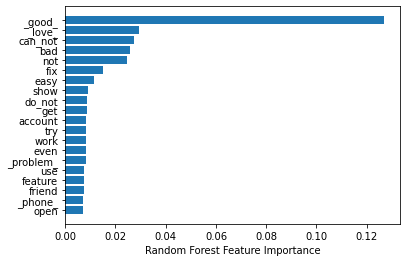

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# get the top 20 important feature
import matplotlib.pyplot as plt
sorted_idx = rf.feature_importances_.argsort()
plt.barh(data_tf_idf.columns[sorted_idx[-20:]], rf.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")
plt.show()

#### RNN

In [ ]:
# !wget https://dso-560-nlp-text-analytics.s3.amazonaws.com/glove6b100dtxt.zip
# !unzip glove6b100dtxt.zip 

In [ ]:
# define the model
def make_sequential_model(plot=False):
    model = Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=max_length))
    model.add(Flatten()) # Flatten makes this a (vocab_size x EMBEDDING_SIZE) x 1 vector.
    model.add(Dense(1, activation='sigmoid')) 
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    # summarize the model
    print(model.summary())
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [ ]:
def score(matrix):
    precision = np.zeros(2)
    recall = np.zeros(2)
    for i in range(2):
        num = matrix[i][i]
        prec_denom = sum(matrix.T[i])
        precision[i] = num/prec_denom if prec_denom != 0 else 0
        rec_denom = sum(matrix[i])
        recall[i] = num/rec_denom if rec_denom != 0 else 0
    print(f'Precision: {precision[1]}')
    print(f'Recall: {recall[1]}')
    print(f'Accuracy: {(matrix[0][0]+matrix[1][1])/matrix.sum()}')

In [ ]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

In [ ]:
def get_max_token_length_per_doc(docs: List[List[str]])-> int:
    return max(list(map(lambda x: len(x.split()), docs)))

In [ ]:
X = data.content_regex
y = data.good 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Training Our Own Embeddings
EMBEDDING_SIZE = 50

tokenizer = Tokenizer(num_words=10000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(X_train)

# integer encode the documents
encoded_docs = integer_encode_documents(X_train, tokenizer)
encoded_test_docs = integer_encode_documents(X_test, tokenizer)
# get the max length in terms of token length
max_length = get_max_token_length_per_doc(X_train)
# pad documents to max length
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')
# set the vocabulary size to some number that represents the total number of unique words in our vocabulary
vocab_size = int(len(tokenizer.word_index) * 1.2)

In [ ]:
sequential_model = make_sequential_model()
# fit the model
history = sequential_model.fit(padded_docs, y_train, epochs=15, verbose=1)
# evaluate the model
loss, accuracy = sequential_model.evaluate(padded_docs, y_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 232, 50)           306600    
                                                                 
 flatten_7 (Flatten)         (None, 11600)             0         
                                                                 
 dense_15 (Dense)            (None, 1)                 11601     
                                                                 
Total params: 318,201
Trainable params: 318,201
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
97/97 [==============================] - 2s 8ms/step - loss: 0.6557 - acc: 0.6244
Epoch 2/15
97/97 [==============================] - 1s 9ms/step - loss: 0.4716 - acc: 0.8194
Epoch 3/15
97/97 [==============================] - 1s 8ms/step - loss: 0.3466 - acc: 0.8769
Epoch 4/15
97/97 [=========

In [ ]:
from sklearn.metrics import confusion_matrix

# make prediction on the padded test documents
pred = sequential_model.predict(padded_test_docs, verbose=0)

score(confusion_matrix(y_test.reset_index().good, (pd.DataFrame(pred)[0] > 0.5)))

Precision: 0.8104738154613467
Recall: 0.8248730964467005
Accuracy: 0.8129032258064516


### Topic Modeling

#### Good

In [ ]:
stopword_list_communication_add=['ever','also','please','rating','star','_good_','five','_like_']
stopword_list_communication_good=stopword_list_2+stopword_list_communication_add+['_problem_']

In [ ]:
# Vectorize The Corpus
data_good = data.loc[data['good']==1, :]
vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             stop_words=stopword_list_communication_good,
                             token_pattern='(?u)\\b[a-zA-Z_]+\\b',min_df=4)

X_gg, gg_terms = vectorizer.fit_transform(data_good['content_regex']), vectorizer.get_feature_names_out()

gg_tf_idf = pd.DataFrame(X_gg.toarray(), columns=gg_terms)

print(f"gg TF-IDF: {gg_tf_idf.shape}")
gg_tf_idf.head(5)

gg TF-IDF: (1967, 299)


,_last update_,_many_ _many_,_many_ easy,_many_ feature,_many_ friend,_many_ people,_many_ thing,_many_ time,_many_ whatsapp,_many_ year,...,whatsapp _many_,whatsapp feature,whatsapp messenger,whatsapp no,whatsapp status,whenever try,wo n,wonderful experience,work fine,work properly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.752767,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Fit NMF model
from sklearn.decomposition import NMF
nmf = NMF(n_components=5)
W_gg = nmf.fit_transform(X_gg)
H_gg = nmf.components_
print(f"Original shape of X_gg is {X_gg.shape}")
print(f"Decomposed W_gg matrix is {W_gg.shape}")
print(f"Decomposed H_gg matrix is {H_gg.shape}")

Original shape of X_gg is (1967, 299)
Decomposed W_gg matrix is (1967, 5)
Decomposed H_gg matrix is (5, 299)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
# Report Results For Each Topic
def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
    """
    Uses the H matrix (K components x M original features) to identify for each
    topic the most frequent tokens.
    """
    for topic, vector in enumerate(H):
        print(f"TOPIC {topic}\n")
        total = vector.sum()
        top_scores = vector.argsort()[::-1][:num_top_tokens]
        token_names = list(map(lambda idx: feature_names[idx], top_scores))
        strengths = list(map(lambda idx: vector[idx] / total, top_scores))
      
        for strength, token_name in zip(strengths, token_names):
            print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
        print(f"=" * 50)
# Get the Top Documents For Each Topic
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
        print("=" * 50)


get_top_tf_idf_tokens_for_topic(H_gg, gg_tf_idf.columns.tolist(), 10)
get_top_documents_for_each_topic(W_gg, data_good['content'].tolist(), 10)

TOPIC 0

easy use (56.5%)

status option (2.1%)

use _one_ (1.5%)

friend use (1.3%)

wan na (1.2%)

super easy (1.2%)

use happy (1.2%)

feature easy (1.2%)

use _many_ (1.2%)

use easy (0.9%)

TOPIC 1

video call (29.1%)

call video (3.3%)

call video call (3.1%)

call quality (3.0%)

voice call (2.5%)

video call quality (2.5%)

message call (1.9%)

group video (1.6%)

group video call (1.6%)

friend family (1.5%)

TOPIC 2

send message (36.4%)

last see (4.1%)

add feature (3.3%)

can_not send (3.0%)

message friend (2.7%)

_one_ thing (2.0%)

option whatsapp (2.0%)

update fix (1.9%)

message get (1.8%)

_one_ _one_ (1.7%)

TOPIC 3

_last update_ (36.8%)

does_not work (5.6%)

stop work (5.2%)

thank _many_ (4.3%)

long time (3.4%)

can_not see (3.0%)

work properly (2.9%)

use daily (2.2%)

wo n (2.1%)

do_not know (2.0%)

TOPIC 4

_phone_ number (23.2%)

user friendly (20.4%)

add feature (4.0%)

family friend (2.2%)

do_not need (2.1

#### Poor

In [ ]:
data_poor = data.loc[data['good']==0, :]

In [ ]:
data_poor['content_regex'] = data_poor['content_regex'].str.replace(r'\b(((should|has|have|did|do|does|is|are|was|were|could|must)_)?not work\s?(properly)?)\b','_problem_',case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
stopword_list_communication_bad=stopword_list_2+stopword_list_communication_add+['_problem_']

In [ ]:
# Vectorize The Corpus

vectorizer = TfidfVectorizer(ngram_range=(2,3),
                             stop_words=stopword_list_communication_bad,
                             token_pattern='(?u)\\b[a-zA-Z_]+\\b',min_df=5,max_df=0.4)

X_gg, gg_terms = vectorizer.fit_transform(data_poor['content_regex']), vectorizer.get_feature_names_out()

gg_tf_idf = pd.DataFrame(X_gg.toarray(), columns=gg_terms)

print(f"gg TF-IDF: {gg_tf_idf.shape}")
gg_tf_idf.head(5)

gg TF-IDF: (1904, 461)


,_last update_,_like_ whatsapp,_many_ feature,_many_ time,_one_ _phone_,_one_ day,_phone_ call,_phone_ no,_phone_ number,able join,...,whenever open,whenever try,wish could,without reason,wo n,wo n let,wont let,work fine,work properly,year ago
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.43794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Fit NMF model
from sklearn.decomposition import NMF
nmf = NMF(n_components=4)
W_gg = nmf.fit_transform(X_gg)
H_gg = nmf.components_
print(f"Original shape of X_gg is {X_gg.shape}")
print(f"Decomposed W_gg matrix is {W_gg.shape}")
print(f"Decomposed H_gg matrix is {H_gg.shape}")

Original shape of X_gg is (1904, 461)
Decomposed W_gg matrix is (1904, 4)
Decomposed H_gg matrix is (4, 461)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
# Report Results For Each Topic

get_top_tf_idf_tokens_for_topic(H_gg, gg_tf_idf.columns.tolist(), 10)
get_top_documents_for_each_topic(W_gg, data_poor['content'].tolist(), 10)

TOPIC 0

video call (42.7%)

can_not see (4.1%)

voice call (2.4%)

call call (1.9%)

internet connection (1.5%)

call video (1.5%)

call someone (1.4%)

call quality (1.3%)

since update (1.3%)

black screen (1.2%)

TOPIC 1

_last update_ (26.2%)

wo n (3.3%)

since _last (3.2%)

since _last update_ (3.2%)

no longer (1.9%)

go back (1.5%)

do_not know (1.5%)

old version (1.5%)

work fine (1.3%)

get bad (1.3%)

TOPIC 2

_phone_ number (27.0%)

verify _phone_ (4.0%)

verify _phone_ number (3.1%)

something go (2.8%)

_many_ time (2.1%)

long time (1.4%)

can_not login (1.3%)

bad experience (1.3%)

change _phone_ (1.2%)

new account (1.2%)

TOPIC 3

send message (10.7%)

not able (2.6%)

can_not send (2.6%)

can_not send message (1.8%)

do_not know (1.7%)

receive message (1.5%)

even though (1.5%)

can_not even (1.5%)

wo n (1.1%)

open chat (1.1%)

Topic 0
100.0% it's not simple, not reliable, always hang on tha time of video call, going to u